In [1]:
import covasim as cv
import numpy as np

cv.options.set(dpi=100, show=False, close=True, verbose=0) # Standard options for Jupyter notebook

Covasim 3.0.7 (2021-06-29) — © 2021 by IDM


In [2]:
r1 = cv.Result(name='test1', npts=10)
r1

————————————————————————————————————————————————————————————
Properties:
  npts                
————————————————————————————————————————————————————————————
color: #000000
 name: test1
scale: True
————————————————————————————————————————————————————————————
values:
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
sim = cv.Sim(pop_size=20, n_days=5)
sim.run()

Sim(<no label>; 2020-03-01 to 2020-03-06; pop: 20 random; epi: 20⚙, 0☠)

In [19]:
sim.result_keys('variant')

['prevalence_by_variant',
 'incidence_by_variant',
 'cum_infections_by_variant',
 'cum_symptomatic_by_variant',
 'cum_severe_by_variant',
 'cum_infectious_by_variant',
 'new_infections_by_variant',
 'new_symptomatic_by_variant',
 'new_severe_by_variant',
 'new_infectious_by_variant',
 'n_exposed_by_variant',
 'n_infectious_by_variant']

In [ ]:
result = sim.to_df()

In [5]:
p = sim.people

In [35]:
# p.keys()  # all keys 
p.person_keys() # person key

['uid',
 'age',
 'sex',
 'symp_prob',
 'severe_prob',
 'crit_prob',
 'death_prob',
 'rel_trans',
 'rel_sus',
 'n_infections']

In [39]:
p.get(['age', 'sex', 'dead', 'death_prob', 'crit_prob', 'n_infections'])

array([[59,  0,  0,  0,  0,  1],
       [78,  1,  0,  0,  0,  1],
       [26,  0,  0,  0,  0,  1],
       [53,  0,  0,  0,  0,  1],
       [65,  0,  0,  0,  0,  1],
       [67,  0,  1,  0,  0,  1],
       [ 9,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  1],
       [11,  0,  0,  0,  0,  1],
       [65,  1,  0,  0,  0,  1],
       [ 5,  0,  0,  0,  0,  1],
       [33,  1,  0,  0,  0,  1],
       [76,  0,  0,  0,  0,  1],
       [36,  1,  0,  0,  0,  1],
       [52,  0,  0,  0,  0,  1],
       [25,  1,  0,  0,  0,  1],
       [52,  0,  0,  0,  0,  1],
       [60,  1,  0,  0,  0,  1],
       [ 2,  0,  0,  0,  0,  1],
       [58,  0,  0,  0,  0,  1]])

In [58]:
# p.layer_keys()
p.contacts.values()[0]['p1']

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19],
      dtype=int32)

In [53]:
p.person(0)

————————————————————————————————————————————————————————————
                  age: 59.944305
             contacts: {'a': array([ 0,  1,  2,  4,  5,  6,  7,  8,
                       9, 10, 11, 12 [...]
            crit_prob: 0.12196078
             critical: False
        date_critical: nan
            date_dead: nan
       date_diagnosed: nan
  date_end_quarantine: nan
         date_exposed: 0.0
      date_infectious: 5.0
   date_known_contact: nan
      date_known_dead: nan
           date_naive: nan
        date_pos_test: nan
     date_quarantined: nan
       date_recovered: 15.0
          date_severe: nan
     date_susceptible: nan
     date_symptomatic: 7.0
          date_tested: nan
      date_vaccinated: nan
                 dead: False
           death_prob: 0.28403002
            diagnosed: False
          dur_disease: 15.0
          dur_exp2inf: 5.0
          dur_inf2sym: 2.0
         dur_sev2crit: nan
          dur_sym2sev: nan
              exposed: False
   exposed_by_v

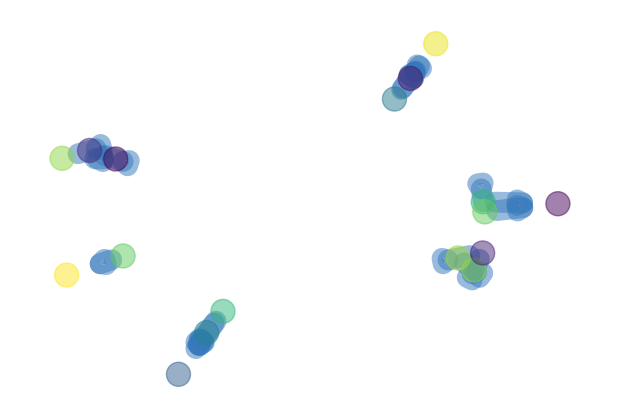

In [64]:
import networkx as nx

sim = cv.Sim(pop_size=20, pop_type='hybrid', contacts=dict(h=3, s=0, w=0, c=0), n_days=5).run()
G = sim.people.to_graph()
nodes = G.nodes(data=True)
edges = G.edges(keys=True)
node_colors = [n['age'] for i,n in nodes]

layer_map = dict(h='#37b', s='#e11', w='#4a4', c='#a49')
edge_colors = [layer_map[G[i][j][k]['layer']] for i,j,k in edges]
edge_weights = [G[i][j][k]['beta']*5 for i,j,k in edges]
nx.draw(G, node_color=node_colors, edge_color=edge_colors, width=edge_weights, alpha=0.5)

In [9]:
p.contacts.values()[0].meta_keys()

dict_keys(['p1', 'p2', 'beta'])

In [26]:
n=8; n_people=5
p1 = np.random.randint(n_people, size=n)
p2 = np.random.randint(n_people, size=n)
beta = np.ones(n)
layer = cv.Layer(p1=p1, p2=p2, beta=beta, label='rand')

In [32]:
print(f'p1: {layer["p1"]} \np2: {layer["p2"]}')

p1: [1 1 1 0 4 1 0 0] 
p2: [3 2 1 0 3 1 1 3]


In [41]:
layer.find_contacts([3,2])

array([0, 1, 4], dtype=int32)